In [2]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 11.2 MB/s eta 0:00:01
     ------------ --------------------------- 3.9/12.8 MB 9.8 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.8 MB 10.5 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 10.2 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/12.8 MB 10.2 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 10.4 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 9.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
NER = spacy.load("en_core_web_sm")

In [3]:
import os
#Get all book files
all_books = [b for b in os.scandir('data') if b.is_file()]
all_books

[<DirEntry '01 Harry Potter and the Sorcerers Stone.txt'>,
 <DirEntry '02 Harry Potter and the Chamber of Secrets.txt'>,
 <DirEntry '03 Harry Potter and the Prisoner of Azkaban.txt'>,
 <DirEntry '04 Harry Potter and the Goblet of Fire.txt'>,
 <DirEntry '05 Harry Potter and the Order of the Phoenix.txt'>,
 <DirEntry '06 Harry Potter and the Half-Blood Prince.txt'>,
 <DirEntry '07 Harry Potter and the Deathly Hallows.txt'>]

In [5]:
book = all_books[0]
with open(book, 'r', encoding='utf-8') as f:
	book_text = f.read()
book_doc = NER(book_text)

In [7]:
displacy.render(book_doc[:2000], style='ent', jupyter=True)

In [5]:
#load character names
import re
character_df = pd.read_csv('harry_potter_characters.csv')
character_df['title'] =  character_df['title'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
#remove white spaces from title
character_df['title'] = character_df['title'].apply(lambda x: x.strip())
#Keep the first name only if all the words in the name start with a capital letter
character_df['character_firstname'] = character_df['title'].apply(lambda x: x.split(' ', 1)[0] if len(x.split(' ', 1)) > 1 and all(word[0].isupper() for word in x.split(' ', 1)[1].split()) else x)
character_df['character_othername'] = character_df['title'].apply(lambda x: x.split(' ', 1)[1] if len(x.split(' ', 1)) > 1 and all(word[0].isupper() for word in x.split(' ', 1)[1].split()) else ' ')
character_df.loc[character_df['character_firstname'] == 'Ronald', 'character_othername'] = 'Ron'
character_df.loc[character_df['character_firstname'] == 'Harry', 'character_othername'] = 'Harry'
character_df.loc[character_df['character_firstname'] == 'Ginevra', 'character_othername'] = 'Ginny'
#remove Albus Potter from title
character_df = character_df[~character_df['title'].str.contains('Albus Potter', na=False)]

In [57]:
np.unique(list(character_df['title']))

array(['Abbott', 'Aberforth Dumbledore', 'Abraxan', 'Abraxas Malfoy',
       'Adalbert Waffling', 'Adrian Pucey', 'Agatha Timms', 'Aged witch',
       "Agnes's son", 'Aidan Lynch', 'Alastor Moody', 'Alberic Grunnion',
       'Albert Runcorn', 'Albino peacock', 'Albus Dumbledore',
       'Alecto Carrow', 'Alexei Levski', 'Alfred Cattermole',
       'Algie Longbottom', 'Ali Bashir', 'Alice Farrell',
       'Alice Longbottom', 'Alicia Spinnet', 'Alphard Black',
       'Ambrosius Flume', "Ambrosius Flume's wife", 'Amelia Bones',
       'Amos Diggory', 'Amulet', 'Amy Benson', 'Amycus Carrow',
       'Andorran Ministry of Magic', 'Andrew Kirke', 'Andromeda Tonks',
       'Angelina Johnson', 'Angus Fleet', 'Anthony Goldstein',
       'Antioch Peverell', 'Antonin Dolohov', 'Apolline Delacour',
       "Apolline Delacour's mother", 'Apollyon Pringle', 'Arabella Figg',
       'Aragog', 'Araminta Meliflua Black', 'Archie Aymslowe',
       'Arcturus Black', 'Arcus', 'Argus Filch', 'Ariana Dumbledor

## Named Entity List per Sentence

In [7]:
sent_entity_df = []
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({
        'sentence': sent,
        "entities": entity_list
    })
sent_entity_df = pd.DataFrame(sent_entity_df)
sent_entity_df

sentence  \
0     (M, r., and, Mrs., Dursley, ,, of, number, fou...   
1     (They, were, the, last, people, you, ’d, expec...   
2     (Mr., Dursley, was, the, director, of, a, firm...   
3     (He, was, a, big, ,, beefy, man, with, hardly,...   
4     (Mrs., Dursley, was, thin, and, blonde, and, h...   
...                                                 ...   
5724  (“, See, you, over, the, summer, ,, then, ., ”...   
5725  (“, Hope, you, have, —, er, —, a, good, holida...   
5726  (“, Oh, ,, I, will, ,, ”, said, Harry, ,, and,...   
5727  (“, They, do, n’t, know, we, ’re, not, allowed...   
5728  (I, ’m, going, to, have, a, lot, of, fun, with...   

                           entities  
0     [Dursley, four, Privet Drive]  
1                                []  
2              [Dursley, Grunnings]  
3                                []  
4                         [Dursley]  
...                             ...  
5724                   [the summer]  
5725       [Hermione, Uncle Vernon]  
5726                        [Harry]  
5727                             []  
5728          [Dudley, this summer]  

[5729 rows x 2 columns]

In [ ]:

# second_name_mapping = {
#     "Dumbledore": "Albus Dumbledore",
#     "Malfoy": "Draco Malfoy",
#     "Weasley": "Ron Weasley",
#     "Snape": "Severus Snape",
# }
# def filter_entity(ent_list, character_df):
#     """
#     Filter entities based on character names.
#     """
#     filtered_entities = []
#     for ent in ent_list:
#         #get the matching title or character_firstname or character_othername
#         if ent in list(character_df.character_firstname):
#             matching_titles = character_df[character_df['character_firstname'] == ent]['title'].tolist()
#         elif ent in list(character_df.character_othername):
#             matching_titles = character_df[character_df['character_othername'] == ent]['title'].tolist()
            
#         elif ent in list(character_df.title):
#             # If it's a title, we can assume it matches the title column     
#             matching_titles = [ent]
#         else:
#             continue
#         if matching_titles:
#             # Apply mapping to the first match
#             canonical = mapping.get(matching_titles[0], matching_titles[0])
#             filtered_entities.append(canonical)
#     return filtered_entities


In [115]:
from typing import List
mapping = {
    "Dumbledore": "Albus Dumbledore",
    "Malfoy": "Draco Malfoy",
    "Weasley": "Ronald Weasley",
    "Snape": "Severus Snape",
}

def filter_entity2(ent_list, character_df):
    """
    Filter entities based on character names.
    Returns canonical character titles using mapping where applicable.
    """
    filtered_entities = []
    
    for ent in ent_list:
        matching_titles = []

        if ent in character_df['title'].values:
            matching_titles.append(ent)
            
        elif ent in character_df['character_firstname'].values:
            matching_titles = character_df[character_df['character_firstname'] == ent]['title'].tolist()
            
        elif ent in character_df['character_othername'].values:
            matches = character_df[character_df['character_othername'] == ent]['title'].tolist()
            matching_titles = mapping.get(ent, matches)
                
        else:
            continue
        if matching_titles:
            filtered_entities.append(matching_titles[0] if isinstance(matching_titles, list) else matching_titles)

    return filtered_entities


In [124]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity2(x, character_df))
#Filter out sentences with no character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].apply(lambda x: len(x) > 0)]
sent_entity_df_filtered

sentence  \
0     (M, r., and, Mrs., Dursley, ,, of, number, fou...   
2     (Mr., Dursley, was, the, director, of, a, firm...   
4     (Mrs., Dursley, was, thin, and, blonde, and, h...   
5     (The, Dursleys, had, a, small, son, called, Du...   
8     (Mrs., Potter, was, Mrs., Dursley, ’s, sister,...   
11    (This, boy, was, another, good, reason, for, k...   
12    (When, Mr., and, Mrs., Dursley, woke, up, on, ...   
13    (Mr., Dursley, hummed, as, he, picked, out, hi...   
15    (At, half, past, eight, ,, Mr., Dursley, picke...   
16    (“, Little, tyke, ,, ”, chortled, Mr., Dursley...   
19    (For, a, second, ,, Mr., Dursley, did, n’t, re...   
23    (Mr., Dursley, blinked, and, stared, at, the, ...   
25    (As, Mr., Dursley, drove, around, the, corner,...   
27    (Mr., Dursley, gave, himself, a, little, shake...   
32    (Mr., Dursley, could, n’t, bear, people, who, ...   
36    (Mr., Dursley, was, enraged, to, see, that, a,...   
38    (But, then, it, struck, Mr., Dursley, that, th...   
39    (The, traffic, moved, on, and, a, few, minutes...   
40    (Mr., Dursley, always, sat, with, his, back, t...   
44    (Mr., Dursley, ,, however, ,, had, a, perfectl...   
53    (“, The, Potters, ,, that, ’s, right, ,, that,...   
59    (He, was, sure, there, were, lots, of, people,...   
60    (Come, to, think, of, it, ,, he, was, n’t, eve...   
63                                      (Or, Harold, .)   
64    (There, was, no, point, in, worrying, Mrs., Du...   
68    (It, was, a, few, seconds, before, Mr., Dursle...   
73    (And, the, old, man, hugged, Mr., Dursley, aro...   
74      (Mr., Dursley, stood, rooted, to, the, spot, .)   
82    (“, Shoo, !, ”, said, Mr., Dursley, loudly, .,...   
86                          (Mr., Dursley, wondered, .)   
89    (Mrs., Dursley, had, had, a, nice, ,, normal, ...   
90    (She, told, him, over, dinner, all, about, Mrs...   
91          (Mr., Dursley, tried, to, act, normally, .)   
92    (When, Dudley, had, been, put, to, bed, ,, he,...   
98    (And, now, ,, over, to, Jim, McGuffin, with, t...   
99    (Going, to, be, any, more, showers, of, owls, ...   
103   (Mr., Dursley, sat, frozen, in, his, armchair, .)   
107   (And, a, whisper, ,, a, whisper, about, the, P...   
111   (“, Er, —, Petunia, ,, dear, —, you, have, n’t...   
114   (“, Why, ?, ”, \n\n, “, Funny, stuff, on, the,...   
116   (…, ”, \n\n, “, So, ?, ”, snapped, Mrs., Dursl...   
118   (Mrs., Dursley, sipped, her, tea, through, pur...   
119   (Mr., Dursley, wondered, whether, he, dared, t...   
121   (Instead, he, said, ,, as, casually, as, he, c...   
125   (“, Oh, ,, yes, ,, ”, said, Mr., Dursley, ,, h...   
128   (While, Mrs., Dursley, was, in, the, bathroom,...   
135   (Mrs., Dursley, fell, asleep, quickly, but, Mr...   
136   (His, last, ,, comforting, thought, before, he...   
137   (The, Potters, knew, very, well, what, he, and...   
138   (Mr., Dursley, might, have, been, drifting, in...   
148   (This, man, ’s, name, was, Albus, Dumbledore, ...   
149   (Albus, Dumbledore, did, n’t, seem, to, realiz...   
160   (If, anyone, looked, out, of, their, window, n...   
161   (Dumbledore, slipped, the, Put, -, Outer, back...   
163   (“, Fancy, seeing, you, here, ,, Professor, Mc...   
172   (“, You, ’d, be, stiff, if, you, ’d, been, sit...   
176   (Professor, McGonagall, sniffed, angrily, ., \...   
184   (Shooting, stars, down, in, Kent, —, I, ’ll, b...   
186   (“, You, ca, n’t, blame, them, ,, ”, said, Dum...   
188   (“, I, know, that, ,, ”, said, Professor, McGo...   
191   (She, threw, a, sharp, ,, sideways, glance, at...   
193   (I, suppose, he, really, has, gone, ,, Dumbled...   
196   (They, ’re, a, kind, of, Muggle, sweet, I, ’m,...   
199   (Professor, McGonagall, flinched, ,, but, Dumb...   
202   (“, I, know, you, have, n’t, ,, said, Professo...   
206   (“, You, flatter, me, ,, ”, said, Dumbledore, ...   
209   (I, have, n’t, blushed, so, much, since, Madam...   
210   (Professor, McGonagall, shot,

In [39]:
# sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])
# pd.reset_option('^display.', silent=True)
# sent_entity_df_filtered

C:\Users\amrin.kareem\AppData\Local\Temp\ipykernel_43340\2728184591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


sentence  \
0     (M, r., and, Mrs., Dursley, ,, of, number, fou...   
2     (Mr., Dursley, was, the, director, of, a, firm...   
4     (Mrs., Dursley, was, thin, and, blonde, and, h...   
8     (Mrs., Potter, was, Mrs., Dursley, ’s, sister,...   
12    (When, Mr., and, Mrs., Dursley, woke, up, on, ...   
...                                                 ...   
5708  (It, was, Ginny, Weasley, ,, Ron, ’s, younger,...   
5713   (Mrs., Weasley, smiled, down, at, them, ., \n\n)   
5716  (“, Thanks, for, the, fudge, and, the, sweater...   
5719  (“, You, must, be, Harry, ’s, family, !, ”, sa...   
5723  (Harry, hung, back, for, a, last, word, with, ...   

                                       entities      character_entities  
0                 [Dursley, four, Privet Drive]                [Vernon]  
2                          [Dursley, Grunnings]                [Vernon]  
4                                     [Dursley]                [Vernon]  
8     [Potter, Dursley, several years, Dursley]  [Lily, Vernon, Vernon]  
12                           [Dursley, Tuesday]                [Vernon]  
...                                         ...                     ...  
5708                [Ginny Weasley, Ron’s, Ron]                [Ronald]  
5713                                  [Weasley]                   [Ron]  
5716                                  [Weasley]                   [Ron]  
5719                         [Harry’s, Weasley]                   [Ron]  
5723                               [Harry, Ron]                [Ronald]  

[1477 rows x 3 columns]

In [ ]:
#Extract Relationships
window_size = 5
relationships = []
for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+ window_size, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i:end_i].character_entities), [])
    
    #remove duplicated characters that are next to each other 
    char_unique = [char_list[i] for i in range(len(char_list)) if i == 0 or char_list[i] != char_list[i-1]]
    if len(char_unique) < 2:
        continue
    for idx, a in enumerate(char_unique[:-1]):
        b = char_unique[idx+1]
        relationships.append({'source': a, 'target': b})
        
relationship_df = pd.DataFrame(relationships)
pd.set_option('display.max_rows', None)
relationship_df

source                        target
0                    Vernon Dursley                        Dudley
1                    Vernon Dursley                        Dudley
2                    Vernon Dursley                        Dudley
3                    Vernon Dursley                        Dudley
4                            Dudley                   Lily Potter
5                       Lily Potter                Vernon Dursley
6                    Vernon Dursley                        Dudley
7                            Dudley                   Lily Potter
8                       Lily Potter                Vernon Dursley
9                            Dudley                   Lily Potter
10                      Lily Potter                Vernon Dursley
11                      Lily Potter                Vernon Dursley
12                   Vernon Dursley                        Dudley
13                      Lily Potter                Vernon Dursley
14                   Vernon Dursley                        Dudley
15                           Dudley                Vernon Dursley
16                      Lily Potter                Vernon Dursley
17                   Vernon Dursley                        Dudley
18                           Dudley                Vernon Dursley
19                   Vernon Dursley                        Dudley
20                           Dudley                Vernon Dursley
21                   Vernon Dursley                        Dudley
22                           Dudley                Vernon Dursley
23                   Vernon Dursley                        Dudley
24                           Dudley                Vernon Dursley
25                   Vernon Dursley                        Dudley
26                           Dudley                Vernon Dursley
27                   Vernon Dursley                        Dudley
28                           Dudley                Vernon Dursley
29                   Vernon Dursley                        Dudley
30                           Dudley                Vernon Dursley
31                   Vernon Dursley                        Dudley
32                           Dudley                Vernon Dursley
33                   Vernon Dursley                        Dudley
34                           Dudley                Vernon Dursley
35                   Vernon Dursley                        Dudley
36                           Dudley                Vernon Dursley
37                   Vernon Dursley                        Dudley
38                           Dudley                Vernon Dursley
39                   Vernon Dursley                        Dudley
40                           Dudley                Vernon Dursley
41                   Vernon Dursley                        Dudley
42                           Dudley                Vernon Dursley
43                     Harry Potter                Vernon Dursley
44                     Harry Potter                Vernon Dursley
45                     Harry Potter                Vernon Dursley
46                     Harry Potter                Vernon Dursley
47                     Harry Potter                Vernon Dursley
48                     Harry Potter                Vernon Dursley
49                      Lily Potter                  Harry Potter
50                      Lily Potter                  Harry Potter
51                      Lily Potter                  Harry Potter
52                      Lily Potter                  Harry Potter
53                      Lily Potter                  Harry Potter
54                     Harry Potter                 Harold Dingle
55                      Lily Potter                  Harry Potter
56                     Harry Potter                 Harold Dingle
57                    Harold Dingle                Vernon Dursley
58                     Harry Potter                 Harold Dingle
59                    Harold Dingle                Vernon Dursley
60 

In [ ]:
#sort the cases with a->b and b->a, so you're sorting across columns horizontally in alphabetical order
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1), columns = relationship_df.columns)
#Aggregate relationships into a weight column 
relationship_df['weight'] = 1
relationship_df = relationship_df.groupby(["source", "target"], sort=False, as_index=False).sum()
relationship_df

source                        target  weight
103                  Harry Potter                Ronald Weasley    1702
22                   Harry Potter                 Rubeus Hagrid    1178
25                         Dudley                  Harry Potter     578
130                  Harry Potter              Hermione Granger     578
149              Hermione Granger                Ronald Weasley     552
199                  Harry Potter                 Severus Snape     440
18               Albus Dumbledore                  Harry Potter     402
77                   Harry Potter             Quirinus Quirrell     384
143                  Draco Malfoy                  Harry Potter     298
104                  Harry Potter            Neville Longbottom     252
118                Ronald Weasley                 Rubeus Hagrid     206
19                   Harry Potter            Minerva McGonagall     205
265                  Harry Potter                   Oliver Wood     185
144                  Draco Malfoy                Ronald Weasley     179
11               Albus Dumbledore            Minerva McGonagall     152
4                    Harry Potter                   Lily Potter     143
198             Quirinus Quirrell                 Severus Snape     138
129            Neville Longbottom                Ronald Weasley     137
47                   Harry Potter          Hogwarts Giant Squid     136
173             Godric Gryffindor                  Harry Potter     128
151              Hermione Granger                 Rubeus Hagrid     127
202                   Argus Filch                  Harry Potter     115
20               Albus Dumbledore                 Rubeus Hagrid     114
237                Ronald Weasley                 Severus Snape     109
139              Hermione Granger            Neville Longbottom     104
229              Hermione Granger                 Severus Snape      96
0                          Dudley                Vernon Dursley      94
86                   Harry Potter             Salazar Slytherin      89
227                 Rubeus Hagrid                 Severus Snape      87
234                  Draco Malfoy            Neville Longbottom      85
59          Gringotts Head Goblin                  Harry Potter      84
121              Albus Dumbledore                Ronald Weasley      83
102                  Harry Potter                 Percy Weasley      83
93             Garrick Ollivander                  Harry Potter      83
21             Minerva McGonagall                 Rubeus Hagrid      75
3                    Harry Potter                Vernon Dursley      73
172                  Harry Potter               Seamus Finnigan      71
110                  Fred Weasley                  Harry Potter      69
418                       Firenze                  Harry Potter      68
38               Father Christmas                  Harry Potter      65
412                         Ronan                 Rubeus Hagrid      64
241                          Fang                 Rubeus Hagrid      60
48           Hogwarts Giant Squid                 Rubeus Hagrid      60
111                  Fred Weasley                George Weasley      58
97                   Harry Potter                        Hedwig      55
419                          Bane                       Firenze      52
200              Albus Dumbledore                 Severus Snape      51
307                  Harry Potter                  Marcus Flint      50
29                  Arabella Figg                  Harry Potter      50
339                  Harry Potter                Nicolas Flamel      49
174             Godric Gryffindor                Ronald Weasley      49
58          Gringotts Head Goblin                 Rubeus Hagrid      48
402                  Draco Malfoy                          Fang      48
107                George Weasley                  Harry Potter      47
212                   Argus Filch                        Peeves    

## Graph Analysis Visualization

### Networkx

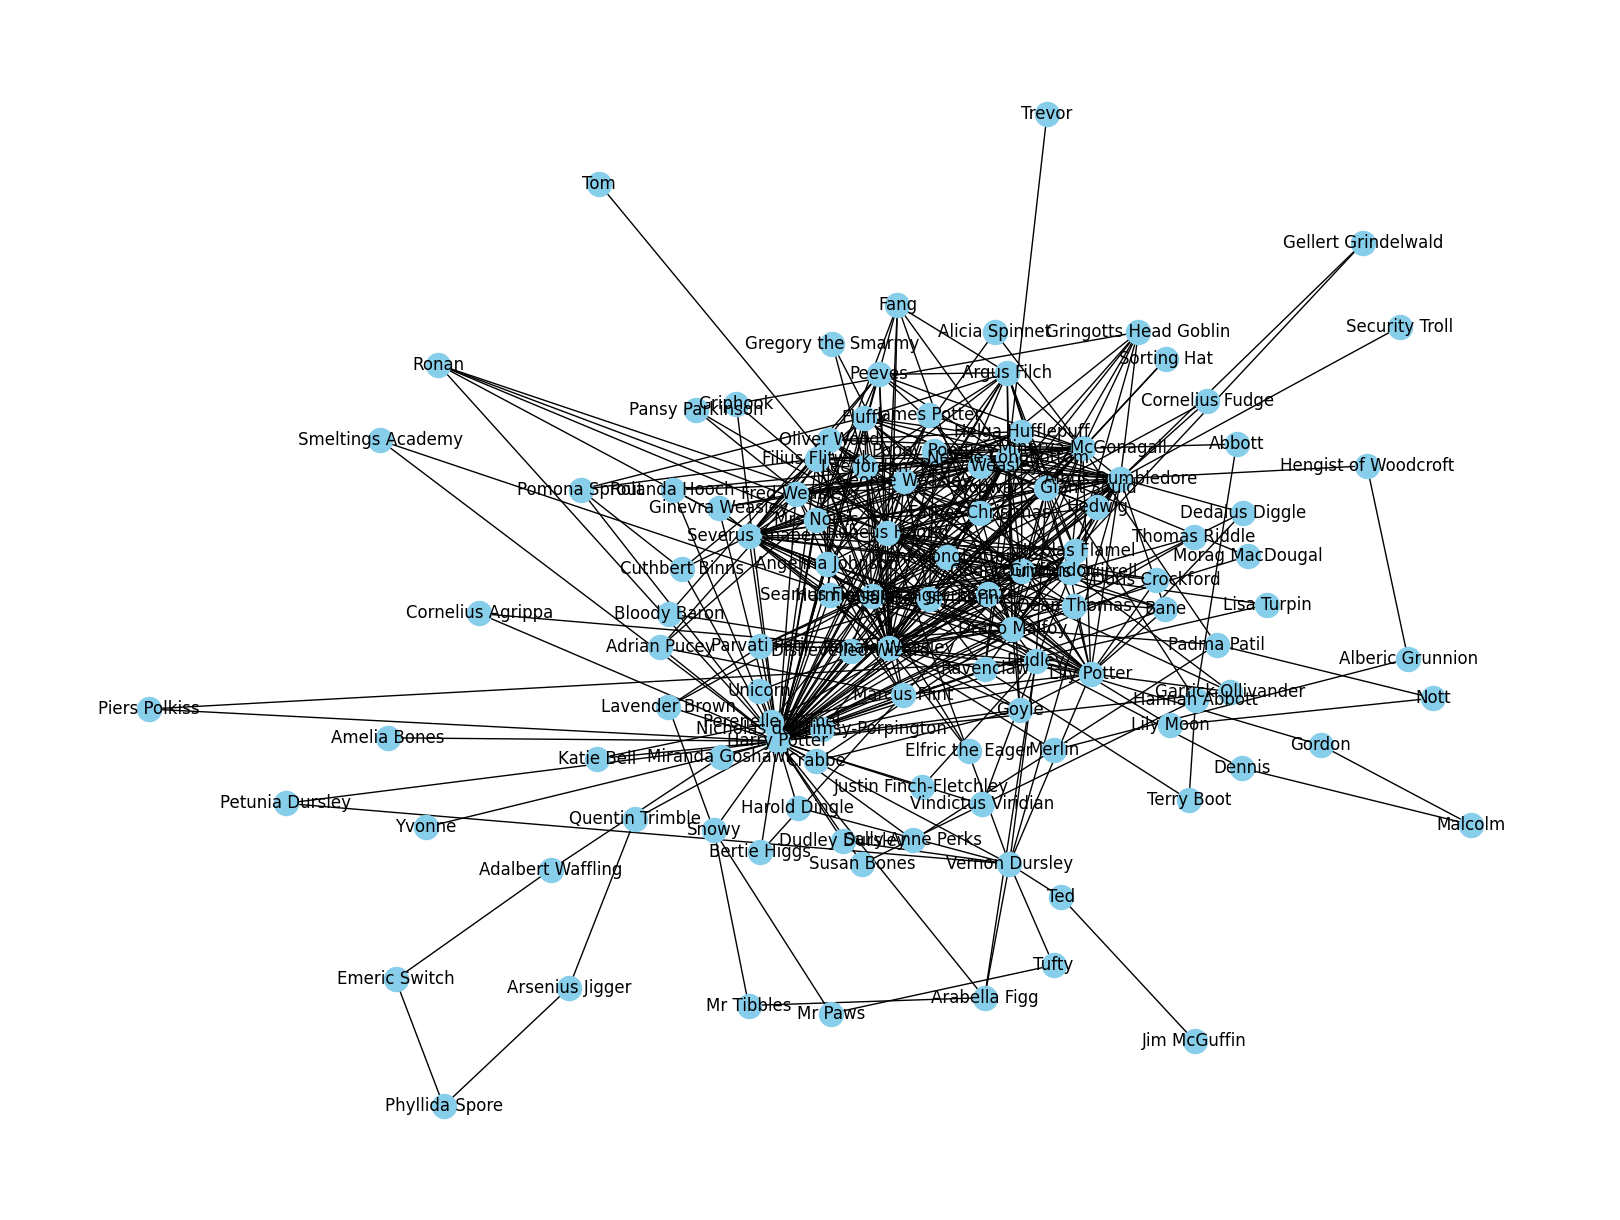

In [74]:
import scipy
plt.figure(figsize=(16, 12))
G = nx.from_pandas_edgelist(relationship_df, source="source", target="target", edge_attr="weight")
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

### Pyvis

In [ ]:
from pyvis.network import Network
from IPython.display import HTML

net = Network(notebook=True, width="1000px", height="700px", bgcolor='black', font_color='white', cdn_resources='remote')
net.repulsion()
node_degree = dict(G.degree)
#set node size attribute
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.save_graph("potterhead.html")

## The most important Characters

In [94]:
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

{'Harry Potter': 0.6875,
 'Ronald Weasley': 0.40178571428571425,
 'Rubeus Hagrid': 0.3482142857142857,
 'Dudley': 0.14285714285714285,
 'Hermione Granger': 0.26785714285714285,
 'Severus Snape': 0.23214285714285712,
 'Albus Dumbledore': 0.2857142857142857,
 'Quirinus Quirrell': 0.19642857142857142,
 'Draco Malfoy': 0.26785714285714285,
 'Neville Longbottom': 0.2589285714285714,
 'Minerva McGonagall': 0.24107142857142855,
 'Oliver Wood': 0.09821428571428571,
 'Lily Potter': 0.20535714285714285,
 'Hogwarts Giant Squid': 0.1875,
 'Godric Gryffindor': 0.1875,
 'Argus Filch': 0.13392857142857142,
 'Vernon Dursley': 0.09821428571428571,
 'Salazar Slytherin': 0.17857142857142855,
 'Gringotts Head Goblin': 0.07142857142857142,
 'Percy Weasley': 0.11607142857142856,
 'Garrick Ollivander': 0.03571428571428571,
 'Seamus Finnigan': 0.09821428571428571,
 'Fred Weasley': 0.125,
 'Firenze': 0.0625,
 'Father Christmas': 0.11607142857142856,
 'Ronan': 0.04464285714285714,
 'Fang': 0.0625,
 'George Weas

<Axes: >

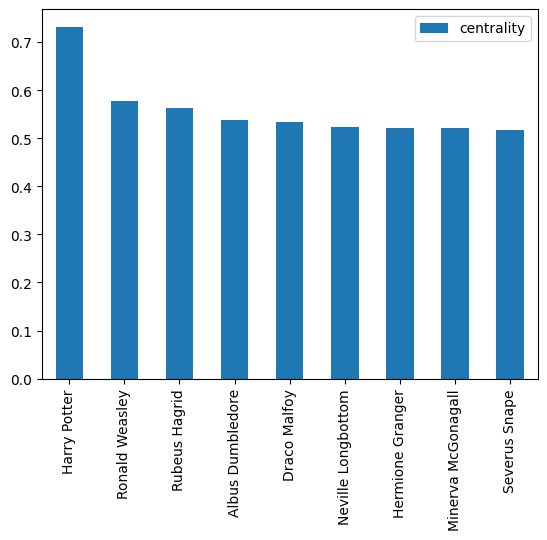

In [96]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

<Axes: >

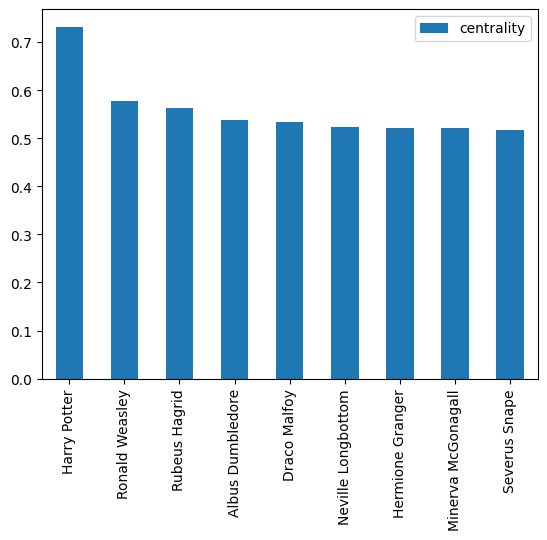

In [97]:
betweeness_dict = nx.betweenness_centrality(G)
betweeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
betweeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')

In [ ]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')
nx.set_node_attributes(G, betweeness_dict, 'betweeness_centrality')

## Community Detection

In [99]:
import community as community_louvain
communities = community_louvain.best_partition(G)

In [104]:
nx.set_node_attributes(G, communities, 'group')
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor='black', font_color='white', cdn_resources='remote')
com_net.repulsion()
com_net.from_nx(G)
com_net.save_graph("potterhead_community.html")

## Analyze the Character's Importance Over Time

In [107]:
character_df

book  \
0      Harry Potter and the Chamber of Secrets   
1      Harry Potter and the Chamber of Secrets   
2      Harry Potter and the Chamber of Secrets   
3      Harry Potter and the Chamber of Secrets   
4      Harry Potter and the Chamber of Secrets   
5      Harry Potter and the Chamber of Secrets   
6      Harry Potter and the Chamber of Secrets   
7      Harry Potter and the Chamber of Secrets   
8      Harry Potter and the Chamber of Secrets   
9      Harry Potter and the Chamber of Secrets   
10     Harry Potter and the Chamber of Secrets   
11     Harry Potter and the Chamber of Secrets   
12     Harry Potter and the Chamber of Secrets   
13     Harry Potter and the Chamber of Secrets   
14     Harry Potter and the Chamber of Secrets   
15     Harry Potter and the Chamber of Secrets   
16     Harry Potter and the Chamber of Secrets   
17     Harry Potter and the Chamber of Secrets   
18     Harry Potter and the Chamber of Secrets   
19     Harry Potter and the Chamber of Secrets   
20     Harry Potter and the Chamber of Secrets   
21     Harry Potter and the Chamber of Secrets   
22     Harry Potter and the Chamber of Secrets   
23     Harry Potter and the Chamber of Secrets   
24     Harry Potter and the Chamber of Secrets   
25     Harry Potter and the Chamber of Secrets   
26     Harry Potter and the Chamber of Secrets   
27     Harry Potter and the Chamber of Secrets   
28     Harry Potter and the Chamber of Secrets   
29     Harry Potter and the Chamber of Secrets   
30     Harry Potter and the Chamber of Secrets   
31     Harry Potter and the Chamber of Secrets   
32     Harry Potter and the Chamber of Secrets   
33     Harry Potter and the Chamber of Secrets   
34     Harry Potter and the Chamber of Secrets   
35     Harry Potter and the Chamber of Secrets   
36     Harry Potter and the Chamber of Secrets   
37     Harry Potter and the Chamber of Secrets   
38     Harry Potter and the Chamber of Secrets   
39     Harry Potter and the Chamber of Secrets   
40     Harry Potter and the Chamber of Secrets   
41     Harry Potter and the Chamber of Secrets   
42     Harry Potter and the Chamber of Secrets   
43     Harry Potter and the Chamber of Secrets   
44     Harry Potter and the Chamber of Secrets   
45     Harry Potter and the Chamber of Secrets   
46     Harry Potter and the Chamber of Secrets   
47     Harry Potter and the Chamber of Secrets   
48     Harry Potter and the Chamber of Secrets   
49     Harry Potter and the Chamber of Secrets   
50     Harry Potter and the Chamber of Secrets   
51     Harry Potter and the Chamber of Secrets   
52     Harry Potter and the Chamber of Secrets   
53     Harry Potter and the Chamber of Secrets   
54     Harry Potter and the Chamber of Secrets   
55     Harry Potter and the Chamber of Secrets   
56     Harry Potter and the Chamber of Secrets   
57     Harry Potter and the Chamber of Secrets   
58     Harry Potter and the Chamber of Secrets   
59     Harry Potter and the Chamber of Secrets   
60     Harry Potter and the Chamber of Secrets   
61     Harry Potter and the Chamber of Secrets   
62     Harry Potter and the Chamber of Secrets   
63     Harry Potter and the Chamber of Secrets   
64     Harry Potter and the Chamber of Secrets   
65     Harry Potter and the Chamber of Secrets   
66     Harry Potter and the Chamber of Secrets   
67     Harry Potter and the Chamber of Secrets   
68     Harry Potter and the Chamber of Secrets   
69     Harry Potter and the Chamber of Secrets   
70     Harry Potter and the Chamber of Secrets   
71     Harry Potter and the Chamber of Secrets   
72     Harry Potter and the Chamber of Secrets   
73        Harry Potter and the Deathly Hallows   
74        Harry Potter and the Deathly Hallows   
75        Harry Potter and the Deathly Hallows   
76        Harry Potter and the Deathly Hallows   
77        Harry Potter and the Deathly Hallows   
78        Harry Potter and the Deathly Hallows   
79        Harry Potter and the Deathly Hal

In [1]:
from utils.functions import *

In [6]:

books_graph = []
all_books.sort(key=lambda x: x.name)
for book in all_books:
    book_text = ner(book)
    sent_entity_df = get_entities(book_text)
    sent_entity_df_filtered = get_filtered_entities(sent_entity_df, character_df)
    relationship_df = extract_relationships(sent_entity_df_filtered)
    G = create_graph(relationship_df)
    books_graph.append(G)


ValueError: [E088] Text of length 1100515 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [ ]:
evol = [nx.degree_centrality(book) for book in books_graph]
degree_evol_df = pd.DataFrame.from_records(evol)
degree_evol_df[["Harry Potter", "Hermione Granger", "Ronald Weasley", "Albus Dumbledore", "Severus Snape"]].plot(figsize=(16, 12), title="Degree Centrality Evolution")